In [1]:
using Pkg

projectdir_static = dirname(Base.active_project())

projectdirx(args...) = joinpath(projectdir_static, args...)

# Generate functions to access the path of default subdirectories.
for dir_type ∈ ("data", "src", "plots", "scripts", "papers")
    function_name = Symbol(dir_type * "dirx")
    @eval begin
        $function_name(args...) = projectdirx($dir_type, args...)
    end
end

using DrWatson

@quickactivate "TissueRigidity"
 
projectname()

"TissueRigidity"

In [2]:
using DifferentialEquations
using StatsBase
using CairoMakie
using XLSX
using DataFrames
using Optimization, OptimizationPolyalgorithms, SciMLSensitivity,OptimizationOptimJL,OptimizationBBO,OptimizationNOMAD

┌ Warning: Error requiring `Enzyme` from `LinearSolve`
│   exception = (LoadError("/Users/boothh/.julia/packages/LinearSolve/qCLK7/ext/LinearSolveEnzymeExt.jl", 1, ArgumentError("Package LinearSolve does not have Enzyme in its dependencies:\n- You may have a partially installed environment. Try `Pkg.instantiate()`\n  to ensure all packages in the environment are installed.\n- Or, if you have LinearSolve checked out for development and have\n  added Enzyme as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with LinearSolve")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00000001209077ec, Ptr{Nothing} @0x0000000120907a36, Ptr{Nothing} @0x000000010d5c66bd, Ptr{Nothing} @0x000000010d5fda6d, Ptr{Nothing} @0x000000010d5fc84f, Ptr{Nothing} @0x000000010d5fd039, Ptr{Nothing} @0x000000010d5fccad, Ptr{Nothing} @0x000000010d5fdef5, Ptr{Nothing} @0x0000000129e85c41, Ptr{Nothing} @0x000000010d

In [3]:
include(srcdirx("Plotting&Utility.jl"))
include(srcdirx("FittingFunctions.jl"))

include(srcdirx("NodalLefty_NewTerm.jl"))

exp_name = "NodalLefty_DiffusionDominated"

include(srcdirx("ExperimentSetups/" * exp_name * ".jl"))

include(scriptsdirx("LoadData.jl"));

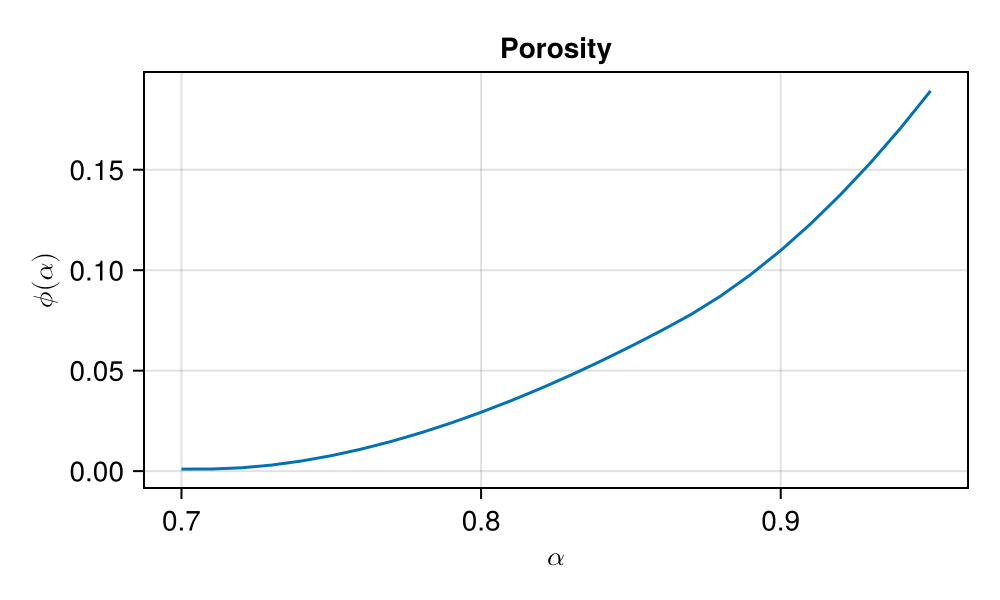

In [4]:
α_range = 0.7:0.01:0.95

fig = Figure(size = (500,300))
ax1 = Axis(fig[1,1],title = "Porosity",ylabel = L"\phi(\alpha)",xlabel = L"\alpha")

lines!(ax1, α_range,[ϕ(α) for α in α_range])

fig

In [5]:


p_orig,p_cp_orig,p_lm_orig = get_params(pv_orig)

tspan = (0,Inf)

u0 = ones(Nc,4)

u0[:,1] .= 1e-10
u0[:,2] .= 1e-10
u0[:,3] .= 0.
u0[:,4] .= α0

prob = ODEProblem(nodal_lefty_spatial_diff!,u0,tspan,p_orig)

ErrorException: cannot declare pv_orig constant; it already has a value

In [6]:
# orig_metrics = get_summary_metrics(pv_orig,prob,data,alpha_data)

orig_metrics = get_summary_metrics(pv_orig,prob,data,alpha_data,0.2)

UndefVarError: UndefVarError: prob not defined

In [7]:
fig = Figure(size = (1000,1000))

fig = plot_summary_newtimes!(fig,[DN0,DL0,kN0,kL0,kE,kNL,σN0,σL0,Na,NL,NE,LN,s0],prob)

fig

UndefVarError: UndefVarError: prob not defined

In [ ]:
# if you want to save the figure

save(plotsdir(exp_name * "_summary.pdf"),fig)